In [1]:
! pip install picos

In [1]:
import pandas as pd
import numpy as np
import picos
import math
import scipy.stats 
import seaborn as sns
from picos import RealVariable, BinaryVariable
from picos import Constant
from picos import Problem
import cvxopt as cvx
import matplotlib.pyplot as plt

In [7]:
import datetime
import time

In [8]:
alpha=0.05
c=1.1
p=500# size of regressor
n=100# size of sample

**$X: $**

In [9]:
X=pd.read_csv("x.csv",index_col=0)
X1=X.values
X=cvx.matrix(X1)

**$\beta_{0}$**  
set $\beta_{0}=(1,1,1,1,1,0,0,0...)$

In [10]:
belta_t=np.zeros(p)
belta_t[:5]=1

$y_i=X^{'}_i*\beta_0+\sigma \epsilon_i$

In [11]:
def get_y0_data(sigma):
    # input sigma
    #generate y with e N(0,1)
    epsilon=np.random.randn(n)
    y=np.dot(X1,belta_t)+sigma*epsilon
    return y

### $\epsilon_i \sim N(0,1)$

$$
\lambda=cn^{1/2}\Phi^{-1}(1-\frac{\alpha}{2p})
$$

In [12]:
lambda_v=c*n**(1/2)*3.885

## Fig1

In [13]:
def Threshold(z,gamma):
    if abs(z)<=gamma:
        y=0
    elif (abs(z)>gamma) & (z>0):
        y=z-gamma
    else:
        y=z+gamma
    return y

In [14]:
y_20=get_y0_data(1)

In [17]:
eps_l=[]
def square_CD_test(X,y,lambda_):
    n=X.shape[0]
    p=X.shape[1]
    beta=np.zeros(p)
    eps=1e-6
    max_iter=50
    temp=beta.copy()
    for i in range(max_iter):
        for j in range(p):
            s1=np.linalg.norm(X[:,j])
            s2=np.dot((y-np.dot(X,beta)),X[:,j])+s1**2*beta[j]
            s3=np.linalg.norm(y-np.dot(X,beta))*lambda_
            beta[j]=Threshold(s2/s1**2,s3/s1**2)
        dbeta=np.linalg.norm(beta-temp)
        eps_l.append(dbeta)
        if dbeta<eps:
            break
        temp=beta.copy()
    return beta
            

In [18]:
beta=square_CD_test(X1,y_20,lambda_v/10)

Text(0.5, 1.0, '$\\epsilon_i\\sim N(0,1)$')

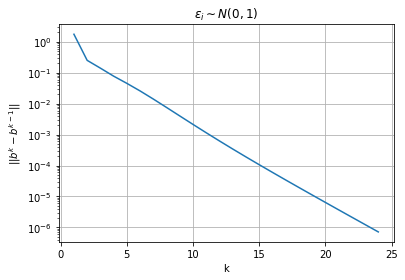

In [19]:

n=len(eps_l)
iter1=range(1,n+1)
plt.yscale("log")
plt.plot(iter1,eps_l)
plt.xlabel("k")
plt.ylabel("$||b^{k}-b^{k-1}||$")
plt.grid()
plt.title('$\epsilon_i\sim N(0,1)$')

## Fig2 and Fig3

In [69]:
sigma=np.linspace(.25,3,12)
time_socp=np.zeros(12)
time_cd=np.zeros(12)
dbeta=np.zeros(12)

In [20]:
def square_CD(X,y,lambda_):
    n=X.shape[0]
    p=X.shape[1]
    beta=np.zeros(p)
    eps=1e-6
    max_iter=50
    temp=beta.copy()
    for i in range(max_iter):
        for j in range(p):
            s1=np.linalg.norm(X[:,j])
            s2=np.dot((y-np.dot(X,beta)),X[:,j])+s1**2*beta[j]
            s3=np.linalg.norm(y-np.dot(X,beta))*lambda_
            beta[j]=Threshold(s2/s1**2,s3/s1**2)
        dbeta=np.linalg.norm(beta-temp)
        if dbeta<eps:
            break
        temp=beta.copy()
    return beta
            

In [70]:
for i in range(12):
    y_20=get_y0_data(sigma[i])
    P2=Problem()
    belta_plus=RealVariable("belta+",p)
    belta_minus=RealVariable("belta-",p)
    y_2=cvx.matrix(y_20)
    t=RealVariable("t",1)
    x=[Constant('x[{0}].T'.format(i), X[i,:]) for i in range(n)]
    y=[Constant('y[{0}]'.format(i), y_2[i]) for i in range(n)]
    v = RealVariable('V',n)
    P2.add_list_of_constraints([(y[i]-x[i]*belta_plus+x[i]*belta_minus==v[i])  for i in range(n)])
    P2.add_constraint(abs(v)<=t)
    P2.add_constraint(belta_plus>=0)
    P2.add_constraint(belta_minus>=0)
    list1=np.zeros(p)
    list2=np.zeros(p)
    list1[::]=lambda_v/n
    l1=Constant('Lambda/n',list1)
    P2.set_objective('min',(t/10+(l1|belta_plus)+(l1|belta_minus)))
    start1=time.clock()
    P2.solve()
    belta=belta_plus-belta_minus
    #dbelta_n=abs(belta-belta_t).value
    belta=np.array([belta[i].value for i in range(p)])
    end1=time.clock()
    t1=end1-start1
    time_socp[i]=t1
    start2=time.clock()
    beta1=square_CD(X1,y_20,lambda_v/10)
    end2=time.clock()
    t2=end2-start2
    time_cd[i]=t2
    dbeta[i]=np.linalg.norm(belta-beta1)

D:\Users\Administrator.MACHENI-KA32LTP\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
D:\Users\Administrator.MACHENI-KA32LTP\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
D:\Users\Administrator.MACHENI-KA32LTP\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
D:\Users\Administrator.MACHENI-KA32LTP\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_c

In [80]:
time_socp.mean()/time_cd.mean()

9.22567731743833

In [78]:
time_cd.mean()

1.6225269158329259

Text(0.5, 1.0, '$\\epsilon_i\\sim N(0,1)$')

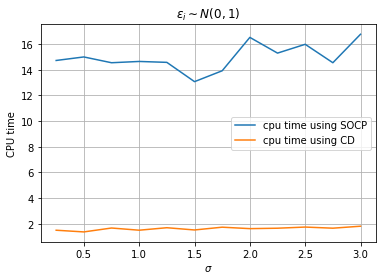

In [74]:
plt.plot(sigma,time_socp,sigma,time_cd)
plt.legend(["cpu time using SOCP","cpu time using CD"])
plt.xlabel('$\sigma$')
plt.ylabel('CPU time')
plt.grid()
plt.title('$\epsilon_i\sim N(0,1)$')

Text(0.5, 1.0, '$\\epsilon_i\\sim N(0,1)$')

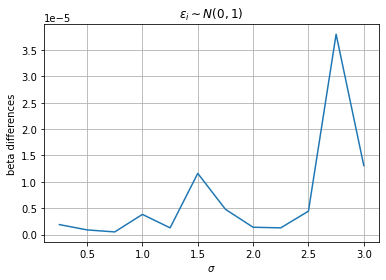

In [75]:
plt.plot(sigma,dbeta)
plt.xlabel('$\sigma$')
plt.ylabel('beta differences')
plt.grid()
plt.title('$\epsilon_i\sim N(0,1)$')